# Zaman Seriyası ilə Kredit Satışı Proqnozlaşdırılması
# Time Series Loan Sales Prediction

**Məqsəd / Goal:** Yalnız tarix xüsusiyyətlərindən istifadə edərək kredit satışını proqnozlaşdırmaq

**Modellər / Models:**
1. Linear Regression (Xətti Reqressiya)
2. Random Forest (Təsadüfi Meşə)
3. ARIMA
4. SARIMAX

**Yanaşma / Approach:** Sadə və anlaşılan, hər model ayrı-ayrılıqda

## 1. Kitabxanaların Yüklənməsi / Import Libraries

In [1]:
# Əsas kitabxanalar / Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Maşın öyrənməsi / Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Zaman seriyası modelləri / Time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Qrafik parametrləri / Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Kitabxanalar yükləndi / Libraries loaded")

✅ Kitabxanalar yükləndi / Libraries loaded


## 2. Məlumatların Yüklənməsi / Load Data

In [2]:
# Məlumatları oxuyaq / Read data
df = pd.read_csv('data/ml_ready_data.csv')

# Hədəf dəyişən / Target variable
target_col = 'Nağd_pul_kredit_satışı'

print(f"Məlumat ölçüsü / Data shape: {df.shape}")
print(f"Dövr / Period: {df['Rüblər'].iloc[0]} → {df['Rüblər'].iloc[-1]}")
print(f"Müşahidələr / Observations: {len(df)}")
print(f"\nİlk 3 sətir / First 3 rows:")
df[['Rüblər', 'Year', 'Quarter', target_col]].head(3)

Məlumat ölçüsü / Data shape: (22, 29)
Dövr / Period: 2020 I → 2025 II
Müşahidələr / Observations: 22

İlk 3 sətir / First 3 rows:


,Rüblər,Year,Quarter,Nağd_pul_kredit_satışı
0,2020 I,2020,1,46642.84149
1,2020 II,2020,2,15709.38447
2,2020 III,2020,3,51257.54777


## 2.5. Cari Vəziyyətin Vizualizasiyası / Current State Visualization

**Məqsəd / Purpose:** Modelləşdirməyə başlamazdan əvvəl məlumatları başa düşmək

In [3]:
# Məlumatları başa düşək / Let's understand the data

print("="*60)
print("MƏLUMATLARIN CARİ VƏZİYYƏTİ / CURRENT STATE OF DATA")
print("="*60)

# Əsas statistika / Basic statistics
print(f"\nDövr / Period: {df['Rüblər'].iloc[0]} → {df['Rüblər'].iloc[-1]}")
print(f"Müşahidələr / Observations: {len(df)}")
print(f"İllər / Years: {df['Year'].min()} - {df['Year'].max()}")
print(f"Rüblər / Quarters: {df['Quarter'].unique()}")

print(f"\n📊 Kredit Satışı Statistikası / Credit Sales Statistics:")
print(f"   • Orta / Mean:     {df[target_col].mean():,.2f}")
print(f"   • Median:          {df[target_col].median():,.2f}")
print(f"   • Min:             {df[target_col].min():,.2f}")
print(f"   • Max:             {df[target_col].max():,.2f}")
print(f"   • Std:             {df[target_col].std():,.2f}")

print("\n" + "="*60)

MƏLUMATLARIN CARİ VƏZİYYƏTİ / CURRENT STATE OF DATA

Dövr / Period: 2020 I → 2025 II
Müşahidələr / Observations: 22
İllər / Years: 2020 - 2025
Rüblər / Quarters: [1 2 3 4]

📊 Kredit Satışı Statistikası / Credit Sales Statistics:
   • Orta / Mean:     80,612.82
   • Median:          85,484.73
   • Min:             15,709.38
   • Max:             126,285.41
   • Std:             32,218.08



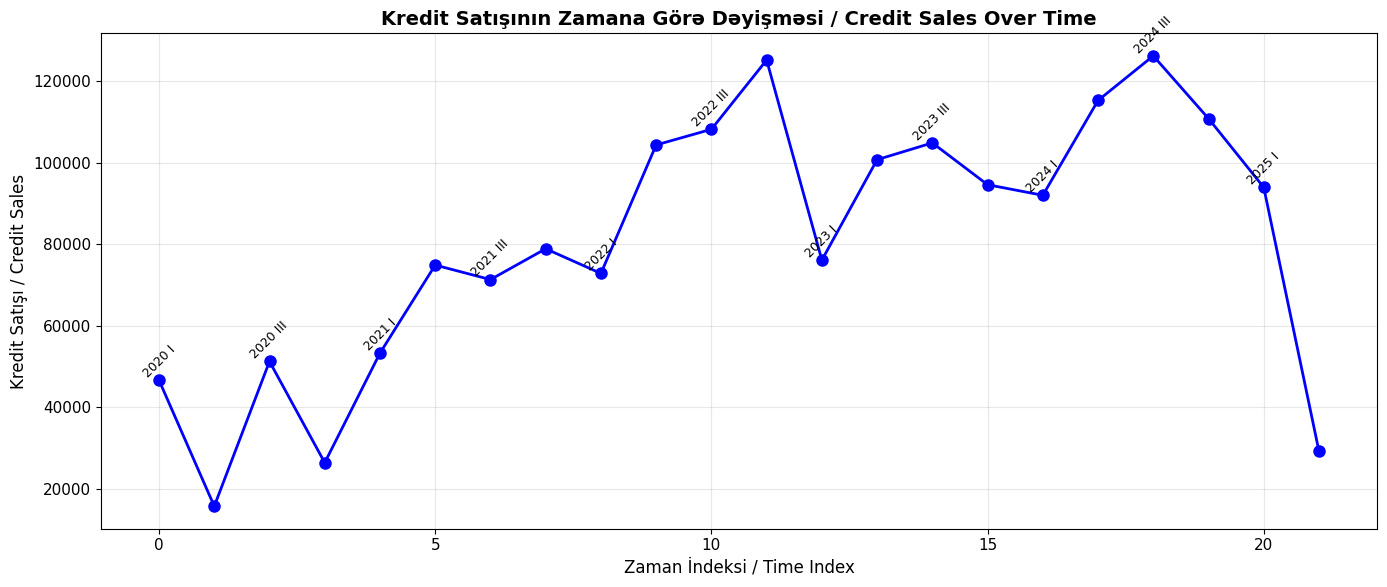

✅ Zaman seriyası qrafiki göstərildi / Time series chart displayed


In [4]:
# Qrafik 1: Zaman seriyası / Chart 1: Time series
plt.figure(figsize=(14, 6))

# Kredit satışını zamanla göstər / Show credit sales over time
plt.plot(range(len(df)), df[target_col].values, 'o-', color='blue', linewidth=2, markersize=8)

# Rüb etiketlərini əlavə et / Add quarter labels
for i, row in df.iterrows():
    if i % 2 == 0:  # Hər ikinci etiketi göstər / Show every second label
        plt.text(i, row[target_col], f"{row['Rüblər']}", 
                fontsize=9, ha='center', va='bottom', rotation=45)

plt.xlabel('Zaman İndeksi / Time Index', fontsize=12)
plt.ylabel('Kredit Satışı / Credit Sales', fontsize=12)
plt.title('Kredit Satışının Zamana Görə Dəyişməsi / Credit Sales Over Time', 
         fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Zaman seriyası qrafiki göstərildi / Time series chart displayed")

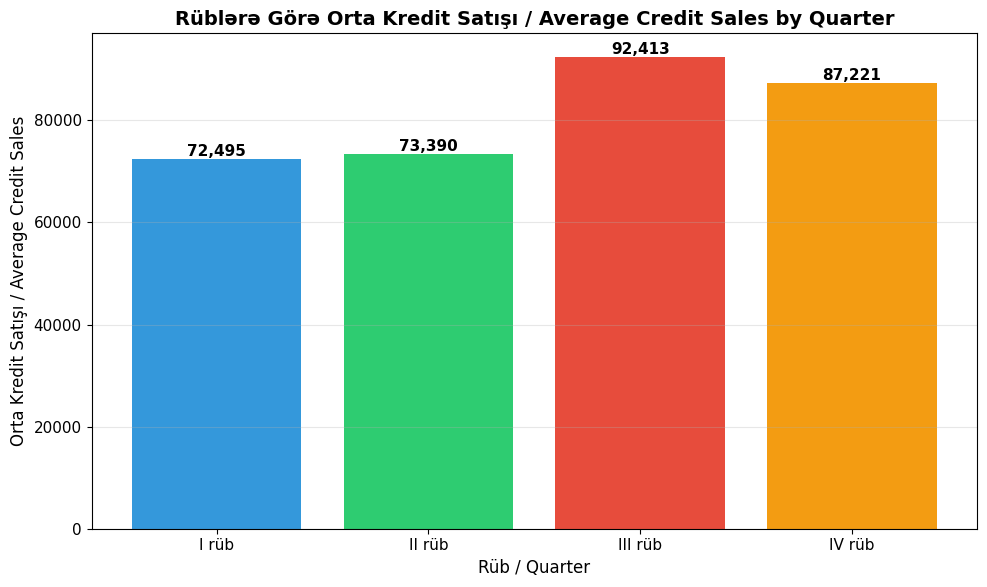

✅ Rüblük nümunə qrafiki göstərildi / Quarterly pattern chart displayed


In [5]:
# Qrafik 2: Rüblərə görə orta satış / Chart 2: Average sales by quarter
plt.figure(figsize=(10, 6))

# Rüblərə görə qruplaşdır / Group by quarter
quarterly_avg = df.groupby('Quarter')[target_col].mean()

bars = plt.bar(quarterly_avg.index, quarterly_avg.values, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.xlabel('Rüb / Quarter', fontsize=12)
plt.ylabel('Orta Kredit Satışı / Average Credit Sales', fontsize=12)
plt.title('Rüblərə Görə Orta Kredit Satışı / Average Credit Sales by Quarter', 
         fontsize=14, fontweight='bold')
plt.xticks([1, 2, 3, 4], ['I rüb', 'II rüb', 'III rüb', 'IV rüb'])
plt.grid(axis='y', alpha=0.3)

# Dəyərləri göstər / Show values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✅ Rüblük nümunə qrafiki göstərildi / Quarterly pattern chart displayed")

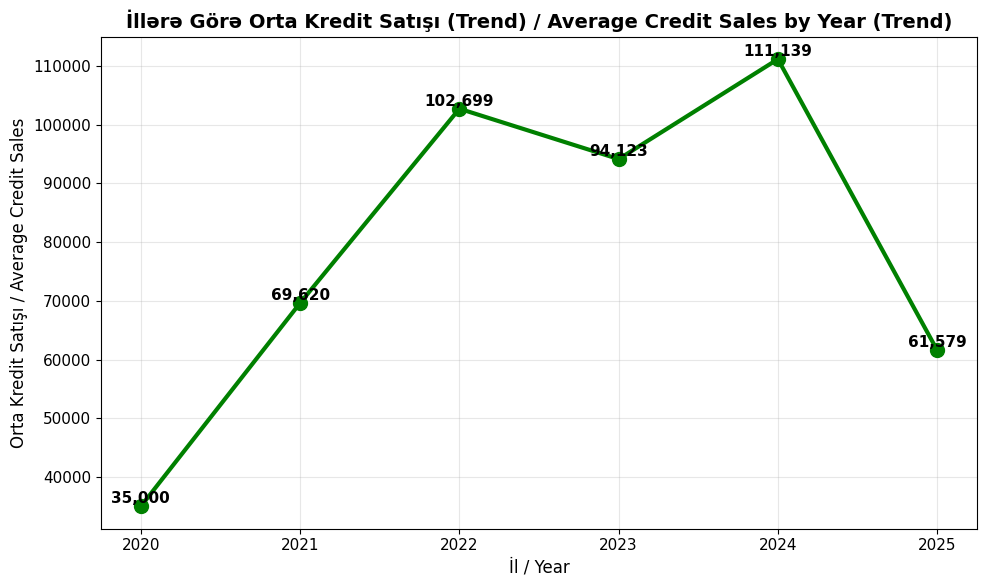

✅ İllik trend qrafiki göstərildi / Yearly trend chart displayed


In [6]:
# Qrafik 3: İllərə görə orta satış / Chart 3: Average sales by year
plt.figure(figsize=(10, 6))

# İllərə görə qruplaşdır / Group by year
yearly_avg = df.groupby('Year')[target_col].mean()

plt.plot(yearly_avg.index, yearly_avg.values, 'o-', color='green', linewidth=3, markersize=10)
plt.xlabel('İl / Year', fontsize=12)
plt.ylabel('Orta Kredit Satışı / Average Credit Sales', fontsize=12)
plt.title('İllərə Görə Orta Kredit Satışı (Trend) / Average Credit Sales by Year (Trend)', 
         fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Dəyərləri göstər / Show values
for year, value in yearly_avg.items():
    plt.text(year, value, f'{value:,.0f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✅ İllik trend qrafiki göstərildi / Yearly trend chart displayed")

## 3. Tarix Xüsusiyyətlərinin Yaradılması / Create Time Features

**Açıqlama / Explanation:** Yalnız tarix məlumatlarından istifadə edərək yeni xüsusiyyətlər yaradırıq

In [7]:
# Zaman indeksini yaradaq / Create time index
df['Time_Index'] = range(len(df))  # 0, 1, 2, 3, ...

# Tarix xüsusiyyətləri / Time features
time_features = ['Time_Index', 'Year', 'Quarter']

# X və y hazırlayaq / Prepare X and y
X = df[time_features].copy()
y = df[target_col].copy()

print("Tarix xüsusiyyətləri / Time features:")
for i, feature in enumerate(time_features, 1):
    print(f"  {i}. {feature}")
    
print(f"\nX ölçüsü / X shape: {X.shape}")
print(f"y ölçüsü / y shape: {y.shape}")

print("\nNümunə / Sample:")
print(X.head())

Tarix xüsusiyyətləri / Time features:
  1. Time_Index
  2. Year
  3. Quarter

X ölçüsü / X shape: (22, 3)
y ölçüsü / y shape: (22,)

Nümunə / Sample:
   Time_Index  Year  Quarter
0           0  2020        1
1           1  2020        2
2           2  2020        3
3           3  2020        4
4           4  2021        1


## 4. Məlumatların Bölünməsi / Split Data

**Qeyd / Note:** Zaman seriyası üçün xronoloji bölgü vacibdir

In [8]:
# İlk 80% təlim, son 20% test / First 80% train, last 20% test
split_point = int(len(df) * 0.8)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print("Bölgü məlumatları / Split information:")
print("="*60)
print(f"Təlim / Train: {len(X_train)} müşahidə ({df['Rüblər'].iloc[0]} → {df['Rüblər'].iloc[split_point-1]})")
print(f"Test:          {len(X_test)} müşahidə ({df['Rüblər'].iloc[split_point]} → {df['Rüblər'].iloc[-1]})")
print("="*60)

Bölgü məlumatları / Split information:
Təlim / Train: 17 müşahidə (2020 I → 2024 I)
Test:          5 müşahidə (2024 II  → 2025 II)


## 5. Model 1: Xətti Reqressiya / Linear Regression

In [9]:
# Modeli yaradaq və öyrədək / Create and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Proqnozlar / Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Qiymətləndirmə / Evaluation
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

print("="*60)
print("MODEL 1: XƏTTİ REQRESSİYA / LINEAR REGRESSION")
print("="*60)
print(f"Təlim R² / Train R²:  {lr_train_r2:.4f}")
print(f"Test R²:              {lr_test_r2:.4f}")
print(f"Test MAE:             {lr_test_mae:,.2f}")
print(f"Test RMSE:            {lr_test_rmse:,.2f}")
print("="*60)

MODEL 1: XƏTTİ REQRESSİYA / LINEAR REGRESSION
Təlim R² / Train R²:  0.6626
Test R²:              -1.2043
Test MAE:             33,397.54
Test RMSE:            51,339.71


### 5.1. Xətti Reqressiyanın Vizualizasiyası / Linear Regression Visualization

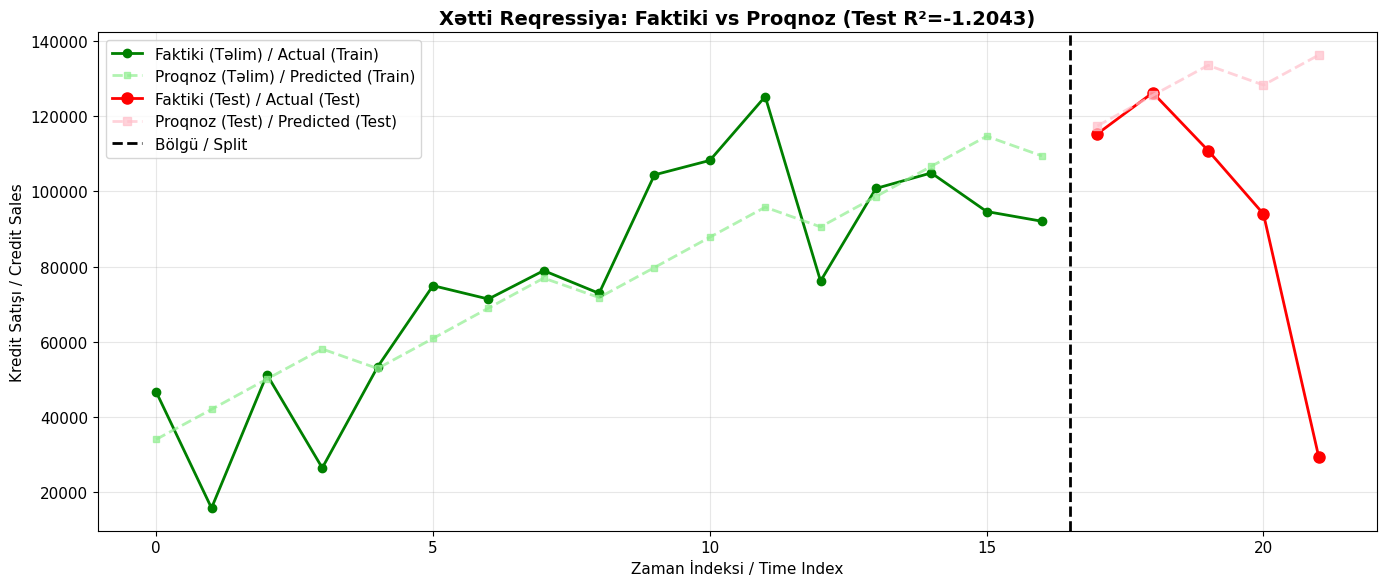

✅ Qrafik göstərildi / Chart displayed


In [10]:
# Qrafik / Plot
plt.figure(figsize=(14, 6))

# Faktiki və proqnoz dəyərlər / Actual vs predicted
plt.plot(range(len(y_train)), y_train.values, 'o-', label='Faktiki (Təlim) / Actual (Train)', 
         color='green', linewidth=2, markersize=6)
plt.plot(range(len(y_train)), lr_train_pred, 's--', label='Proqnoz (Təlim) / Predicted (Train)', 
         color='lightgreen', linewidth=2, markersize=4, alpha=0.7)

test_start = len(y_train)
plt.plot(range(test_start, test_start + len(y_test)), y_test.values, 'o-', 
         label='Faktiki (Test) / Actual (Test)', color='red', linewidth=2, markersize=8)
plt.plot(range(test_start, test_start + len(y_test)), lr_test_pred, 's--', 
         label='Proqnoz (Test) / Predicted (Test)', color='pink', linewidth=2, markersize=6, alpha=0.7)

plt.axvline(x=test_start-0.5, color='black', linestyle='--', linewidth=2, label='Bölgü / Split')
plt.xlabel('Zaman İndeksi / Time Index')
plt.ylabel('Kredit Satışı / Credit Sales')
plt.title(f'Xətti Reqressiya: Faktiki vs Proqnoz (Test R²={lr_test_r2:.4f})', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Qrafik göstərildi / Chart displayed")

## 6. Model 2: Təsadüfi Meşə / Random Forest

In [11]:
# Modeli yaradaq və öyrədək / Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# Proqnozlar / Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Qiymətləndirmə / Evaluation
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print("="*60)
print("MODEL 2: TƏSADÜFİ MEŞƏ / RANDOM FOREST")
print("="*60)
print(f"Təlim R² / Train R²:  {rf_train_r2:.4f}")
print(f"Test R²:              {rf_test_r2:.4f}")
print(f"Test MAE:             {rf_test_mae:,.2f}")
print(f"Test RMSE:            {rf_test_rmse:,.2f}")
print("="*60)

MODEL 2: TƏSADÜFİ MEŞƏ / RANDOM FOREST
Təlim R² / Train R²:  0.9454
Test R²:              0.0261
Test MAE:             26,016.66
Test RMSE:            34,124.73


### 6.1. Təsadüfi Meşənin Vizualizasiyası / Random Forest Visualization

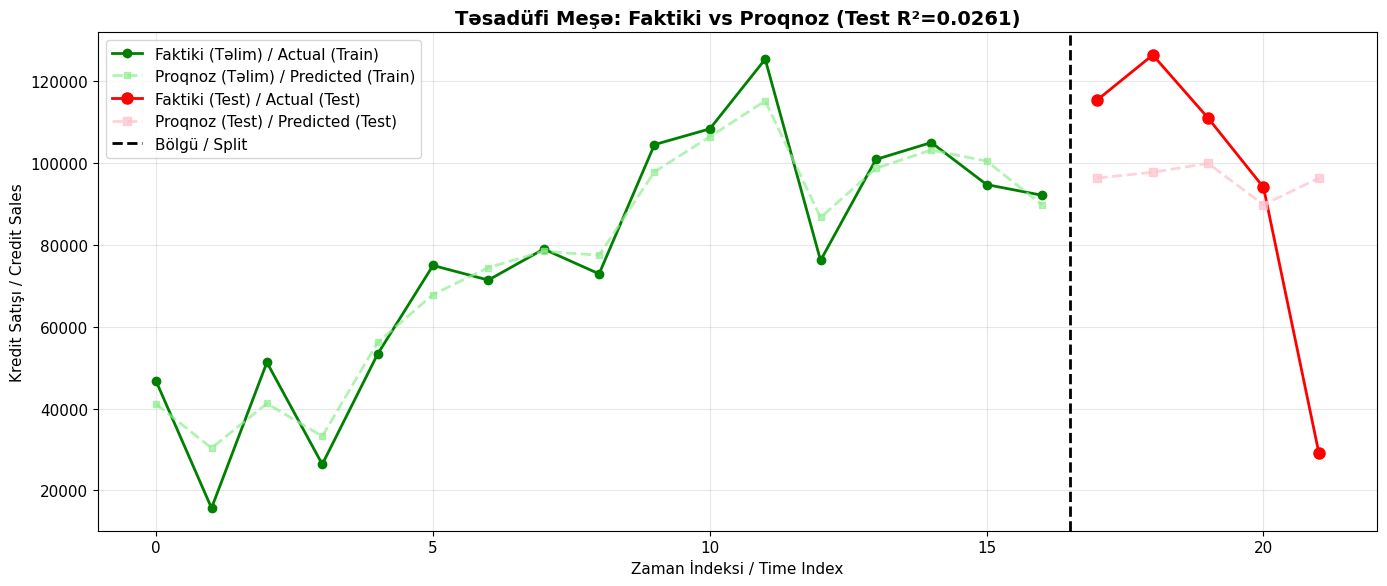

✅ Qrafik göstərildi / Chart displayed


In [12]:
# Qrafik / Plot
plt.figure(figsize=(14, 6))

# Faktiki və proqnoz dəyərlər / Actual vs predicted
plt.plot(range(len(y_train)), y_train.values, 'o-', label='Faktiki (Təlim) / Actual (Train)', 
         color='green', linewidth=2, markersize=6)
plt.plot(range(len(y_train)), rf_train_pred, 's--', label='Proqnoz (Təlim) / Predicted (Train)', 
         color='lightgreen', linewidth=2, markersize=4, alpha=0.7)

test_start = len(y_train)
plt.plot(range(test_start, test_start + len(y_test)), y_test.values, 'o-', 
         label='Faktiki (Test) / Actual (Test)', color='red', linewidth=2, markersize=8)
plt.plot(range(test_start, test_start + len(y_test)), rf_test_pred, 's--', 
         label='Proqnoz (Test) / Predicted (Test)', color='pink', linewidth=2, markersize=6, alpha=0.7)

plt.axvline(x=test_start-0.5, color='black', linestyle='--', linewidth=2, label='Bölgü / Split')
plt.xlabel('Zaman İndeksi / Time Index')
plt.ylabel('Kredit Satışı / Credit Sales')
plt.title(f'Təsadüfi Meşə: Faktiki vs Proqnoz (Test R²={rf_test_r2:.4f})', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Qrafik göstərildi / Chart displayed")

## 7. Model 3: ARIMA

**Açıqlama / Explanation:** ARIMA - AutoRegressive Integrated Moving Average
- Yalnız keçmiş dəyərlərdən istifadə edir / Uses only past values
- Klassik zaman seriyası modeli / Classic time series model

In [13]:
# ARIMA modeli (p=1, d=1, q=1) / ARIMA model with simple parameters
print("ARIMA modeli öyrədilir... / Training ARIMA model...")

# Sadə ARIMA(1,1,1) modelini sınayaq / Try simple ARIMA(1,1,1)
arima_model = ARIMA(y_train, order=(1, 1, 1))
arima_fitted = arima_model.fit()

# Təlim proqnozları / Train predictions
arima_train_pred = arima_fitted.fittedvalues

# Test proqnozları / Test predictions
arima_forecast = arima_fitted.forecast(steps=len(y_test))
arima_test_pred = arima_forecast.values

# Qiymətləndirmə / Evaluation
# Təlim üçün NaN dəyərləri çıxaraq / Remove NaN values for train evaluation
valid_train_idx = ~np.isnan(arima_train_pred)
arima_train_r2 = r2_score(y_train[valid_train_idx], arima_train_pred[valid_train_idx])

arima_test_r2 = r2_score(y_test, arima_test_pred)
arima_test_mae = mean_absolute_error(y_test, arima_test_pred)
arima_test_rmse = np.sqrt(mean_squared_error(y_test, arima_test_pred))

print("="*60)
print("MODEL 3: ARIMA(1,1,1)")
print("="*60)
print(f"Təlim R² / Train R²:  {arima_train_r2:.4f}")
print(f"Test R²:              {arima_test_r2:.4f}")
print(f"Test MAE:             {arima_test_mae:,.2f}")
print(f"Test RMSE:            {arima_test_rmse:,.2f}")
print("="*60)

ARIMA modeli öyrədilir... / Training ARIMA model...


MODEL 3: ARIMA(1,1,1)
Təlim R² / Train R²:  0.4649
Test R²:              -0.0073
Test MAE:             28,135.66
Test RMSE:            34,705.99


### 7.1. ARIMA Vizualizasiyası / ARIMA Visualization

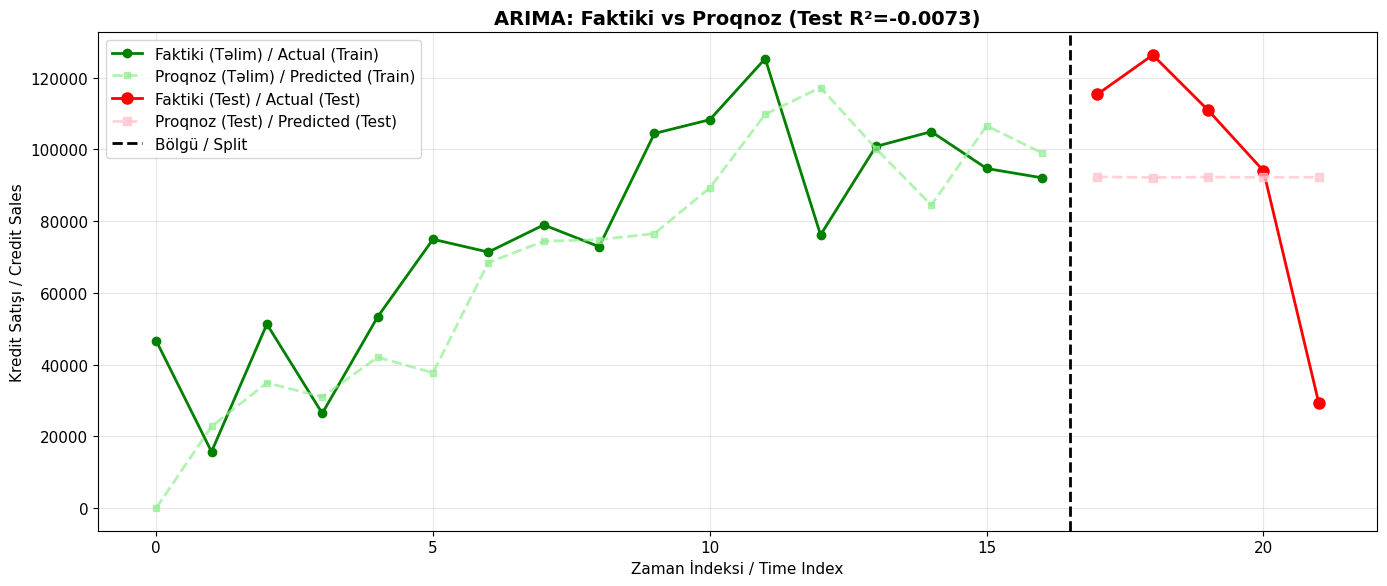

✅ Qrafik göstərildi / Chart displayed


In [14]:
# Qrafik / Plot
plt.figure(figsize=(14, 6))

# Faktiki dəyərlər / Actual values
plt.plot(range(len(y_train)), y_train.values, 'o-', label='Faktiki (Təlim) / Actual (Train)', 
         color='green', linewidth=2, markersize=6)
plt.plot(range(len(y_train)), arima_train_pred, 's--', label='Proqnoz (Təlim) / Predicted (Train)', 
         color='lightgreen', linewidth=2, markersize=4, alpha=0.7)

test_start = len(y_train)
plt.plot(range(test_start, test_start + len(y_test)), y_test.values, 'o-', 
         label='Faktiki (Test) / Actual (Test)', color='red', linewidth=2, markersize=8)
plt.plot(range(test_start, test_start + len(y_test)), arima_test_pred, 's--', 
         label='Proqnoz (Test) / Predicted (Test)', color='pink', linewidth=2, markersize=6, alpha=0.7)

plt.axvline(x=test_start-0.5, color='black', linestyle='--', linewidth=2, label='Bölgü / Split')
plt.xlabel('Zaman İndeksi / Time Index')
plt.ylabel('Kredit Satışı / Credit Sales')
plt.title(f'ARIMA: Faktiki vs Proqnoz (Test R²={arima_test_r2:.4f})', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Qrafik göstərildi / Chart displayed")

## 8. Model 4: SARIMAX

**Açıqlama / Explanation:** SARIMAX - Seasonal ARIMA with eXogenous variables
- Mövsümi nümunələri tutur / Captures seasonal patterns
- Rüblük (quarterly) məlumat üçün uyğundur / Suitable for quarterly data

In [15]:
# SARIMAX modeli (mövsüm = 4 rüb) / SARIMAX model with seasonal period = 4 quarters
print("SARIMAX modeli öyrədilir... / Training SARIMAX model...")

# SARIMAX(1,1,1)x(1,1,1,4) - rüblük mövsümi / with quarterly seasonality
sarimax_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_fitted = sarimax_model.fit(disp=False)

# Təlim proqnozları / Train predictions
sarimax_train_pred = sarimax_fitted.fittedvalues

# Test proqnozları / Test predictions
sarimax_forecast = sarimax_fitted.forecast(steps=len(y_test))
sarimax_test_pred = sarimax_forecast.values

# Qiymətləndirmə / Evaluation
valid_train_idx = ~np.isnan(sarimax_train_pred)
sarimax_train_r2 = r2_score(y_train[valid_train_idx], sarimax_train_pred[valid_train_idx])

sarimax_test_r2 = r2_score(y_test, sarimax_test_pred)
sarimax_test_mae = mean_absolute_error(y_test, sarimax_test_pred)
sarimax_test_rmse = np.sqrt(mean_squared_error(y_test, sarimax_test_pred))

print("="*60)
print("MODEL 4: SARIMAX(1,1,1)x(1,1,1,4)")
print("="*60)
print(f"Təlim R² / Train R²:  {sarimax_train_r2:.4f}")
print(f"Test R²:              {sarimax_test_r2:.4f}")
print(f"Test MAE:             {sarimax_test_mae:,.2f}")
print(f"Test RMSE:            {sarimax_test_rmse:,.2f}")
print("="*60)

SARIMAX modeli öyrədilir... / Training SARIMAX model...


MODEL 4: SARIMAX(1,1,1)x(1,1,1,4)
Təlim R² / Train R²:  0.3901
Test R²:              -0.1577
Test MAE:             26,061.63
Test RMSE:            37,205.62


### 8.1. SARIMAX Vizualizasiyası / SARIMAX Visualization

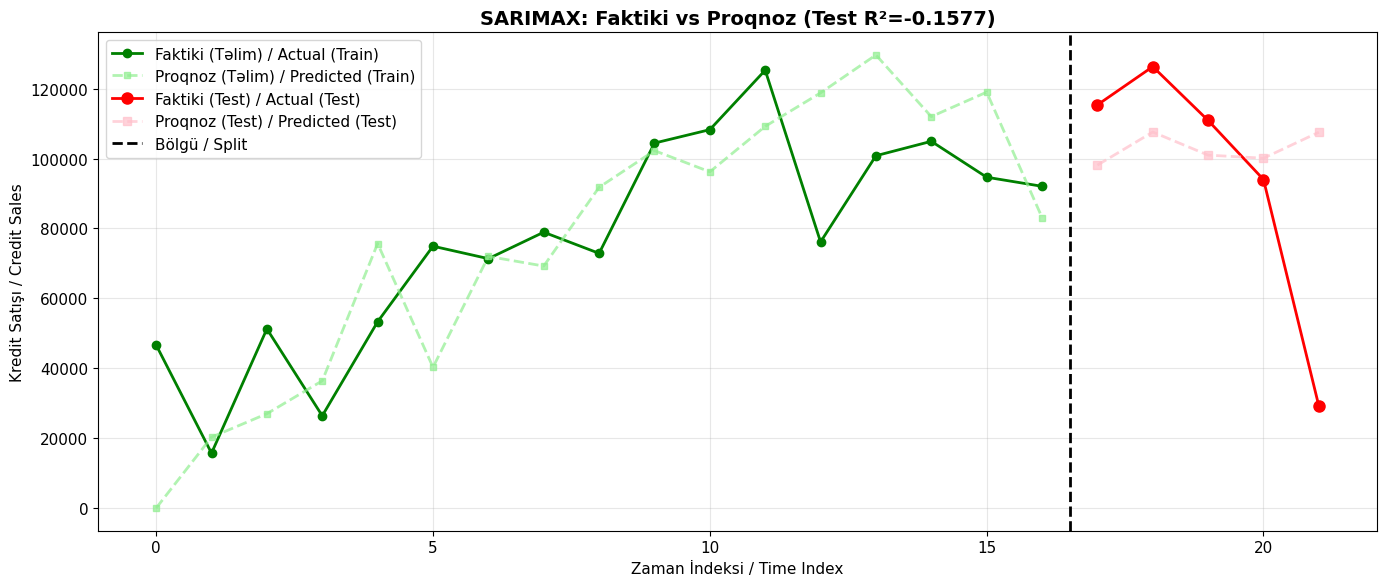

✅ Qrafik göstərildi / Chart displayed


In [16]:
# Qrafik / Plot
plt.figure(figsize=(14, 6))

# Faktiki dəyərlər / Actual values
plt.plot(range(len(y_train)), y_train.values, 'o-', label='Faktiki (Təlim) / Actual (Train)', 
         color='green', linewidth=2, markersize=6)
plt.plot(range(len(y_train)), sarimax_train_pred, 's--', label='Proqnoz (Təlim) / Predicted (Train)', 
         color='lightgreen', linewidth=2, markersize=4, alpha=0.7)

test_start = len(y_train)
plt.plot(range(test_start, test_start + len(y_test)), y_test.values, 'o-', 
         label='Faktiki (Test) / Actual (Test)', color='red', linewidth=2, markersize=8)
plt.plot(range(test_start, test_start + len(y_test)), sarimax_test_pred, 's--', 
         label='Proqnoz (Test) / Predicted (Test)', color='pink', linewidth=2, markersize=6, alpha=0.7)

plt.axvline(x=test_start-0.5, color='black', linestyle='--', linewidth=2, label='Bölgü / Split')
plt.xlabel('Zaman İndeksi / Time Index')
plt.ylabel('Kredit Satışı / Credit Sales')
plt.title(f'SARIMAX: Faktiki vs Proqnoz (Test R²={sarimax_test_r2:.4f})', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Qrafik göstərildi / Chart displayed")

## 9. Modellərin Müqayisəsi / Model Comparison

In [17]:
# Nəticələri cədvəldə göstərək / Show results in table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'ARIMA', 'SARIMAX'],
    'Təlim R² / Train R²': [lr_train_r2, rf_train_r2, arima_train_r2, sarimax_train_r2],
    'Test R²': [lr_test_r2, rf_test_r2, arima_test_r2, sarimax_test_r2],
    'Test MAE': [lr_test_mae, rf_test_mae, arima_test_mae, sarimax_test_mae],
    'Test RMSE': [lr_test_rmse, rf_test_rmse, arima_test_rmse, sarimax_test_rmse]
})

# Ən yaxşı modeli tapaq / Find best model
comparison = comparison.sort_values('Test R²', ascending=False)

print("="*80)
print("BÜTÜN MODELLƏRİN MÜQAYİSƏSİ / COMPARISON OF ALL MODELS")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

best_model = comparison.iloc[0]
print(f"\n🏆 Ən yaxşı model / Best model: {best_model['Model']}")
print(f"   Test R²: {best_model['Test R²']:.4f}")
print(f"   Test MAE: {best_model['Test MAE']:,.2f}")

BÜTÜN MODELLƏRİN MÜQAYİSƏSİ / COMPARISON OF ALL MODELS
            Model  Təlim R² / Train R²   Test R²     Test MAE    Test RMSE
    Random Forest             0.945356  0.026125 26016.657345 34124.729359
            ARIMA             0.464937 -0.007335 28135.659086 34705.992549
          SARIMAX             0.390072 -0.157663 26061.630247 37205.623372
Linear Regression             0.662614 -1.204305 33397.536256 51339.709402

🏆 Ən yaxşı model / Best model: Random Forest
   Test R²: 0.0261
   Test MAE: 26,016.66


### 9.1. Müqayisə Qrafikləri / Comparison Charts

**3 ayrı qrafik / 3 separate charts**

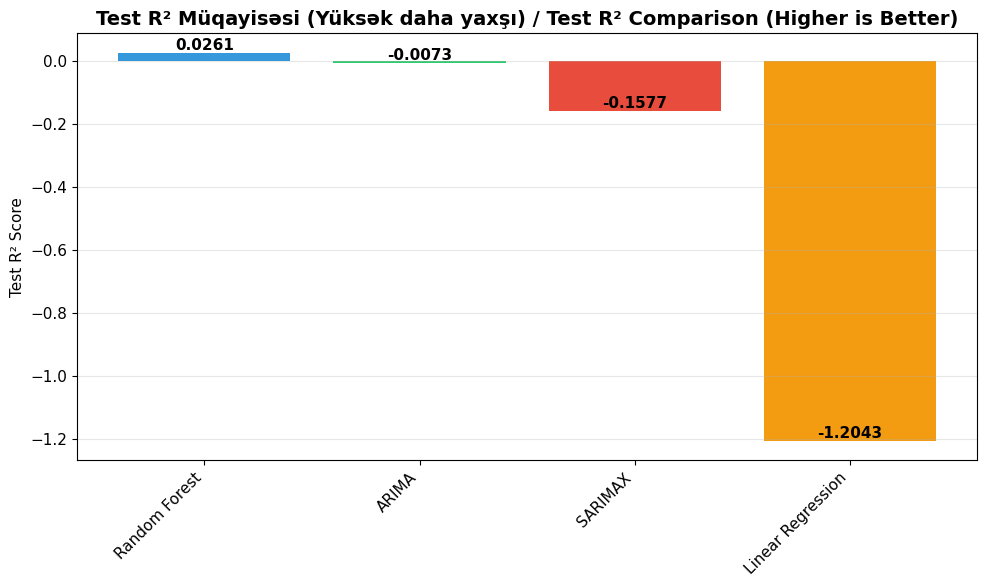

In [18]:
# Qrafik 1: Test R² müqayisəsi / Chart 1: Test R² comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison['Model'], comparison['Test R²'], color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.ylabel('Test R² Score')
plt.title('Test R² Müqayisəsi (Yüksək daha yaxşı) / Test R² Comparison (Higher is Better)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Dəyərləri göstər / Show values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

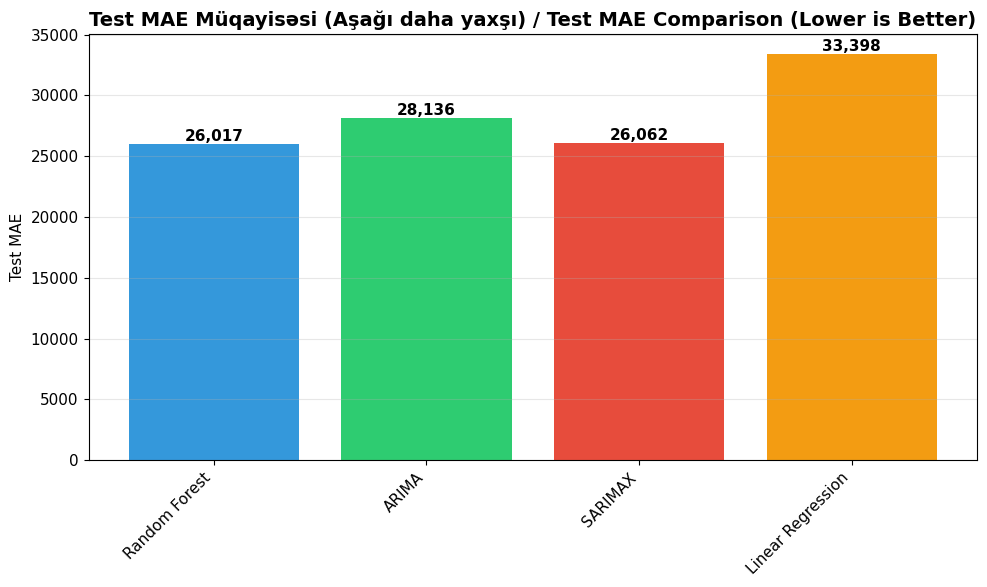

In [19]:
# Qrafik 2: Test MAE müqayisəsi / Chart 2: Test MAE comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison['Model'], comparison['Test MAE'], color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.ylabel('Test MAE')
plt.title('Test MAE Müqayisəsi (Aşağı daha yaxşı) / Test MAE Comparison (Lower is Better)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Dəyərləri göstər / Show values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

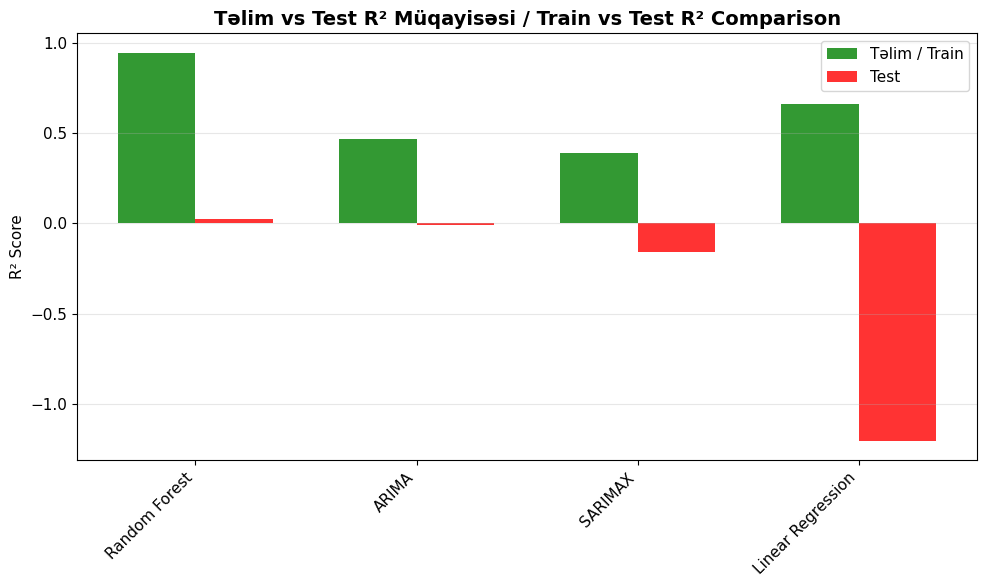

✅ Bütün müqayisə qrafikləri göstərildi / All comparison charts displayed


In [20]:
# Qrafik 3: Təlim vs Test R² / Chart 3: Train vs Test R²
plt.figure(figsize=(10, 6))

x = np.arange(len(comparison))
width = 0.35

plt.bar(x - width/2, comparison['Təlim R² / Train R²'], width, label='Təlim / Train', 
        color='green', alpha=0.8)
plt.bar(x + width/2, comparison['Test R²'], width, label='Test', 
        color='red', alpha=0.8)

plt.ylabel('R² Score')
plt.title('Təlim vs Test R² Müqayisəsi / Train vs Test R² Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, comparison['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Bütün müqayisə qrafikləri göstərildi / All comparison charts displayed")

## 10. Yekun Nəticələr və Tövsiyələr / Final Results and Recommendations

In [21]:
print("="*80)
print("YEKİN NƏTİCƏLƏR / FINAL RESULTS")
print("="*80)

print("\n📊 Məlumat haqqında / About the data:")
print(f"   • Müşahidələr / Observations: {len(df)}")
print(f"   • Təlim / Training: {len(X_train)}")
print(f"   • Test: {len(X_test)}")
print(f"   • Xüsusiyyətlər / Features: Yalnız tarix (Time_Index, Year, Quarter)")

print("\n🏆 Ən yaxşı model / Best model:")
print(f"   • Model: {best_model['Model']}")
print(f"   • Test R²: {best_model['Test R²']:.4f}")
print(f"   • Test MAE: {best_model['Test MAE']:,.2f}")

print("\n💡 Tövsiyələr / Recommendations:")
best_r2 = best_model['Test R²']

if best_r2 < 0.3:
    print("   ⚠️  Aşağı proqnoz dəqiqliyi / Low prediction accuracy")
    print("   • Yalnız tarix xüsusiyyətləri kifayət deyil / Time features alone are not enough")
    print("   • Ekonomik göstəricilər əlavə edin / Add economic indicators")
elif best_r2 < 0.6:
    print("   ⚠️  Orta proqnoz dəqiqliyi / Moderate prediction accuracy")
    print("   • Model bəzi nümunələri tutur / Model captures some patterns")
    print("   • Əlavə xüsusiyyətlər performansı artıra bilər / Additional features may improve performance")
else:
    print("   ✅ Yaxşı proqnoz dəqiqliyi / Good prediction accuracy")
    print("   • Model zaman nümunələrini yaxşı tutur / Model captures time patterns well")

print("\n📈 Model seçimi / Model selection:")
print("   • ARIMA/SARIMAX: Klassik zaman seriyası üçün / For classical time series")
print("   • Random Forest: Qeyri-xətti əlaqələr üçün / For non-linear relationships")
print("   • Linear Regression: Sadə trend üçün / For simple trends")

print("\n" + "="*80)
print("✅ ANALİZ TAMAMLANDI / ANALYSIS COMPLETE")
print("="*80)

YEKİN NƏTİCƏLƏR / FINAL RESULTS

📊 Məlumat haqqında / About the data:
   • Müşahidələr / Observations: 22
   • Təlim / Training: 17
   • Test: 5
   • Xüsusiyyətlər / Features: Yalnız tarix (Time_Index, Year, Quarter)

🏆 Ən yaxşı model / Best model:
   • Model: Random Forest
   • Test R²: 0.0261
   • Test MAE: 26,016.66

💡 Tövsiyələr / Recommendations:
   ⚠️  Aşağı proqnoz dəqiqliyi / Low prediction accuracy
   • Yalnız tarix xüsusiyyətləri kifayət deyil / Time features alone are not enough
   • Ekonomik göstəricilər əlavə edin / Add economic indicators

📈 Model seçimi / Model selection:
   • ARIMA/SARIMAX: Klassik zaman seriyası üçün / For classical time series
   • Random Forest: Qeyri-xətti əlaqələr üçün / For non-linear relationships
   • Linear Regression: Sadə trend üçün / For simple trends

✅ ANALİZ TAMAMLANDI / ANALYSIS COMPLETE
